In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np

import utility_functions as fn

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Initialization

In [2]:
# manually define building names
buildingnames = ['304Elm',
                 'YUAG',
                 'Berkeley',
                 'Hopper',
                 'Davenport',
                 'Malone',
                 'Sprague',
                 'Trumbull',
                 '17HH']

In [3]:
# read steam data from csv into a new dataframe
raw = pd.read_csv('data/steam_raw.csv',index_col=0,na_values=['Bad','#VALUE!'])

# save units information, to be converted once I know the factors
unit_info = raw.head(1)
raw.drop('units:',inplace=True)

# housekeeping
raw = raw.astype(float)
raw = raw.iloc[0:5063]

# raw.head(3)

Initial missing values:
304Elm       11
Berkeley      5
Hopper        1
Davenport    14
Malone       12
Sprague      13
Trumbull     11
17HH         11
dtype: int64


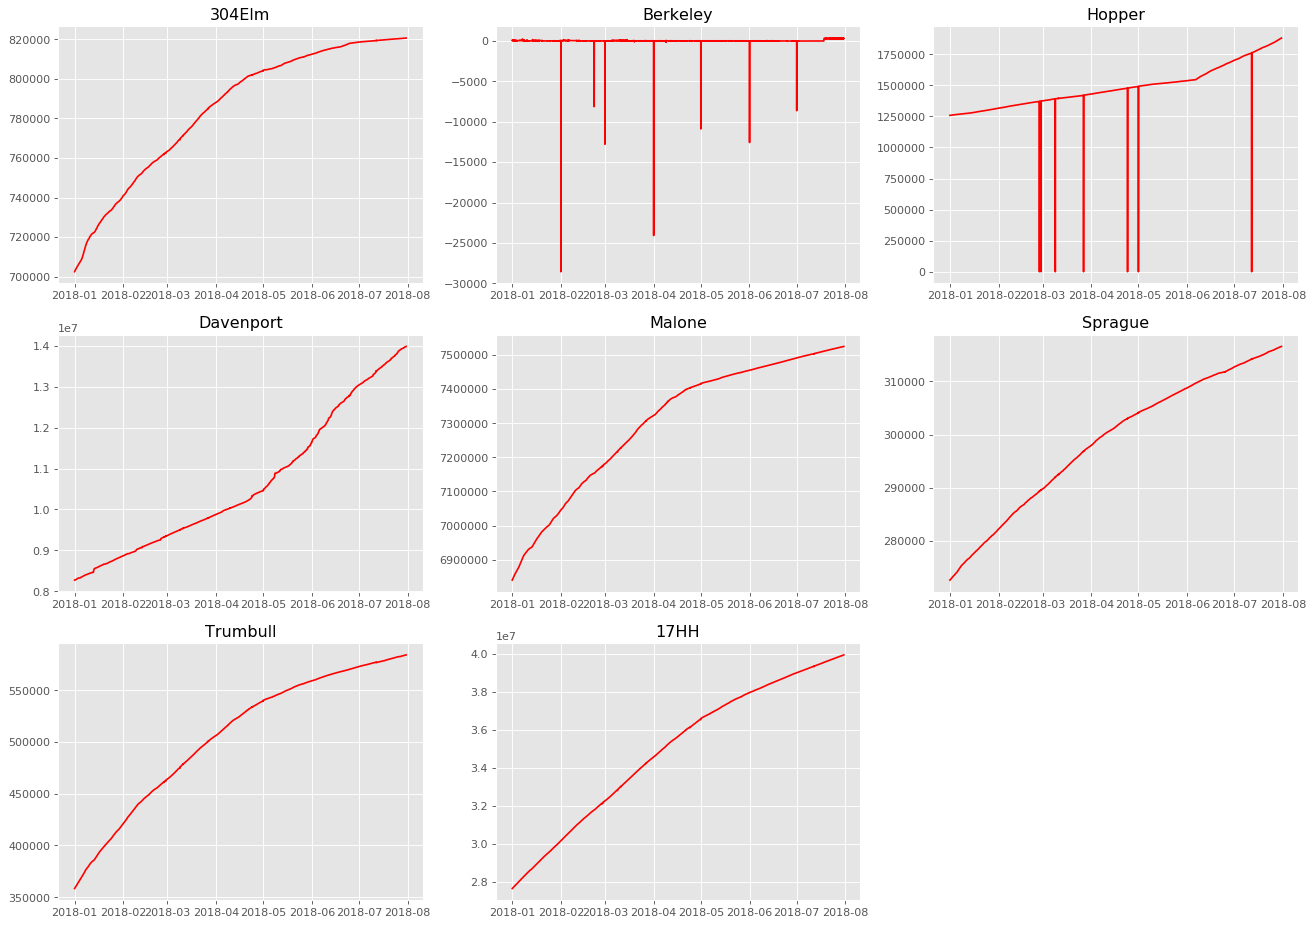

In [4]:
# reindex appropriately by hourly datetime
raw.index = pd.to_datetime(raw.index,format='%d-%b-%y %H:00:00')

# add missing rows by full reindexing
correct_dt = pd.DatetimeIndex(start='2018-01-01 01:00:00',end='2018-07-31 00:00:00',freq='h')
raw = raw.reindex(index=correct_dt)

# rename columns
raw.columns = buildingnames

# remove YUAG for now, too much missing data
raw.drop('YUAG',axis=1,inplace=True)

# diagnostics
fn.plot_all(raw,'2018-01-01 01:00:00','2018-07-31 00:00:00')
print('Missing values:')
print(raw.isnull().sum())

New missing values from this step:
304Elm        0
Berkeley      7
Hopper       10
Davenport     0
Malone        0
Sprague       0
Trumbull      0
17HH          0
dtype: int64


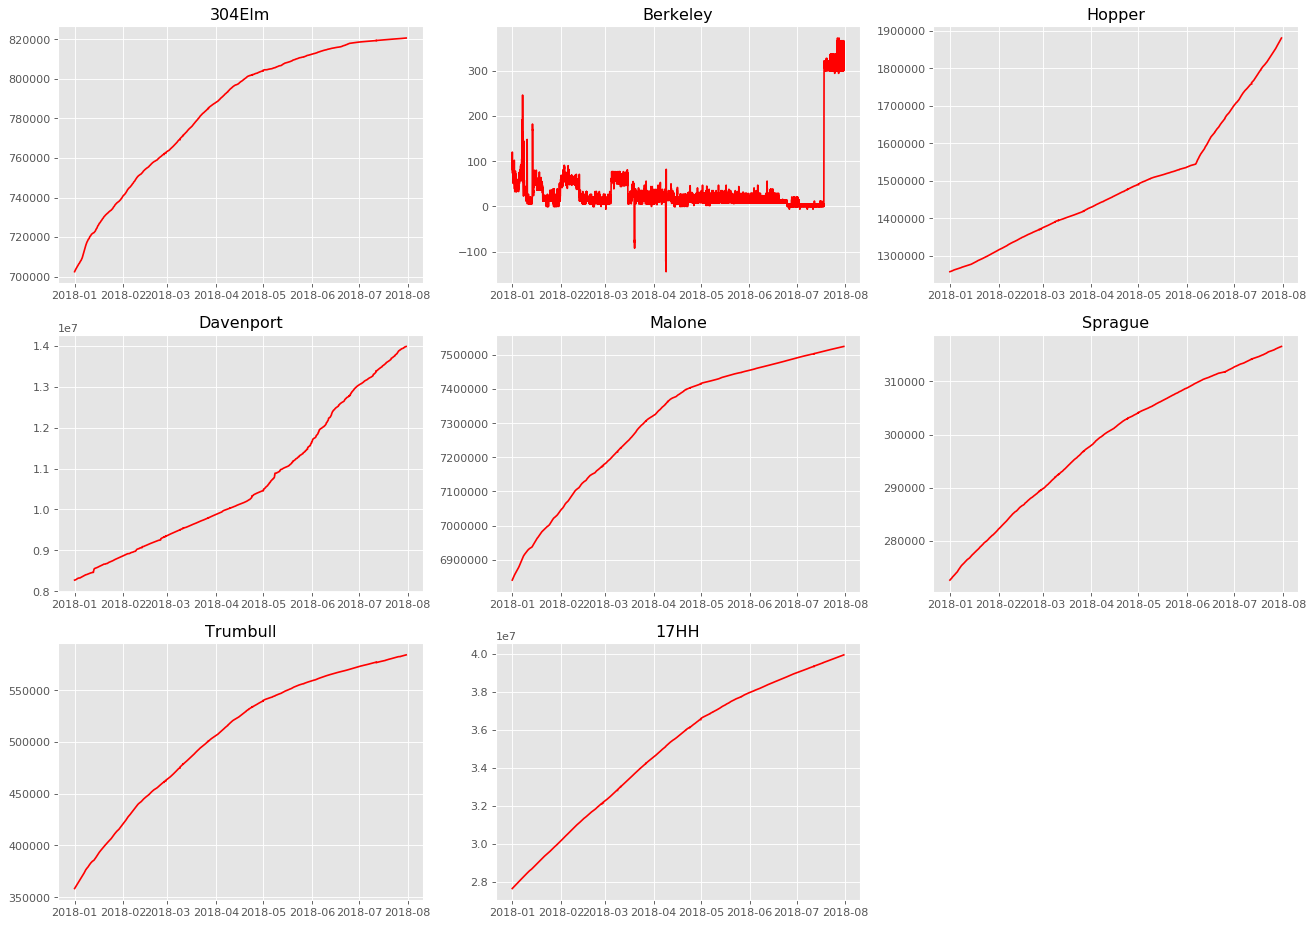

In [5]:
# std dev method to find outliers
raw = raw.where(raw > raw.median() - 5*raw.std())
raw = raw.where(raw < raw.median() + 5*raw.std())

# diagnostics
fn.plot_all(raw,'2018-01-01 01:00:00','2018-07-31 00:00:00')
print('Missing values:')
print(raw.isnull().sum())

Missing values:
304Elm       0
Berkeley     1
Hopper       0
Davenport    0
Malone       0
Sprague      0
Trumbull     0
17HH         0
dtype: int64


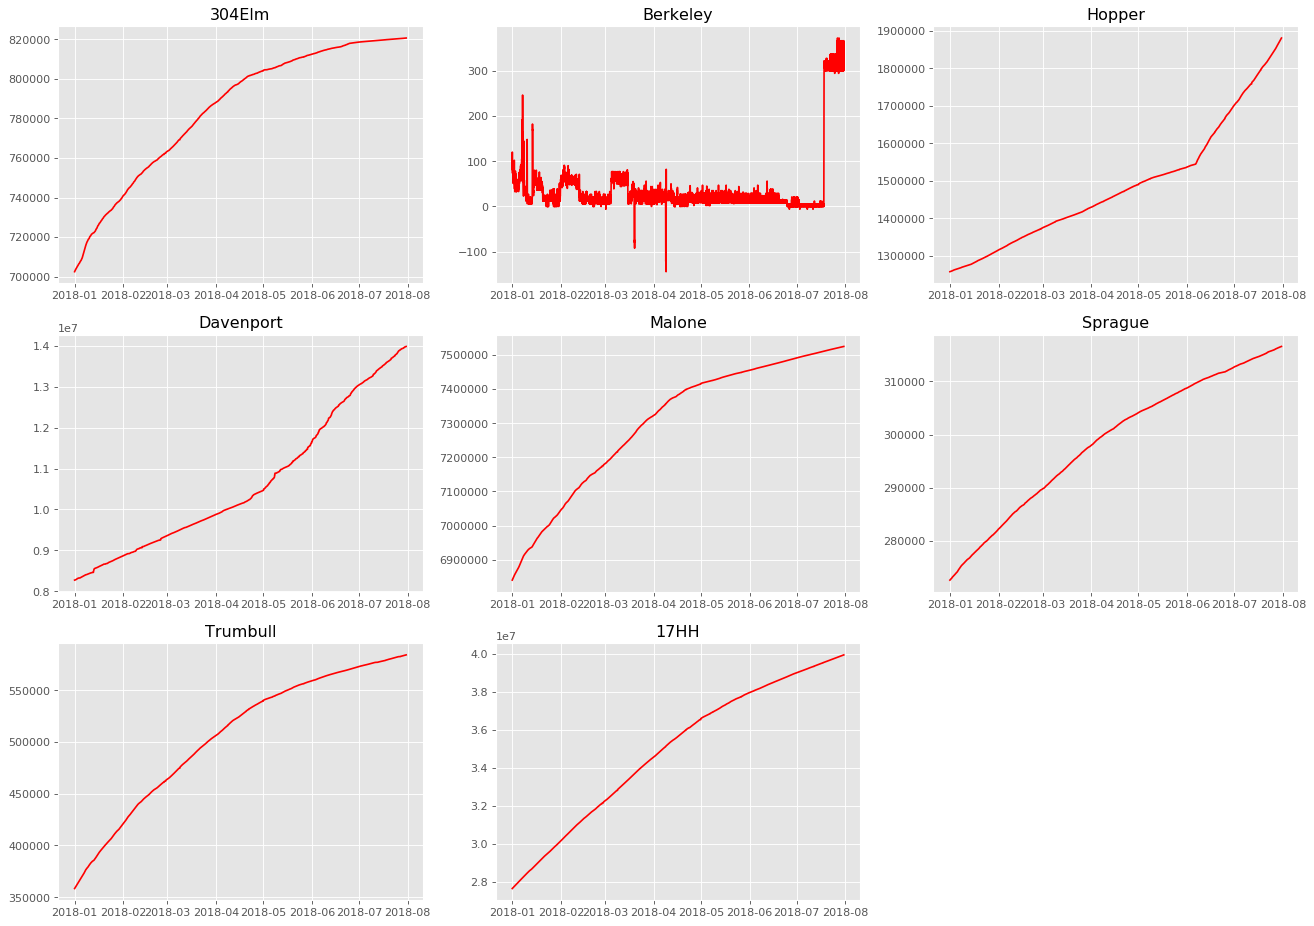

In [8]:
# interpolate gaps in consumption data 6 hours and shorter, optional
for k in raw.columns:
    raw[k] = fn.limited_impute(raw[k],7)
    
# diagnostics
fn.plot_all(raw,'2018-01-01 01:00:00','2018-07-31 00:00:00')
print('Missing values:')
print(raw.isnull().sum())